##### Author: Davoud Masoumi dmasoumi@ucmerced.edu 
Version 2, Updated on November 2022

In [1]:
import gizmo_analysis as gizmo
import utilities as ut
import numpy as np

In [2]:
## NOTE: Inputs can be either position or velocity in the "Translated Box Coordinate Frame"
## If inputs are positions in the "Translated Box Coordinate Frame", outputs will be positions in the "Loebman Lab Coordinate Frame"
## If inputs are velocities in the "Translated Box Coordinate Frame", outputs will be velocities in the "Loebman Lab Coordinate Frame"

def ll_coordinate_transformation(rotation_matrix, x_translated_box_coordinate, y_translated_box_coordinate, z_translated_box_coordinate):
    
    # identifying the elements of the True Rotation Matrix
    rot_mat11 = rotation_matrix[0][0][0]
    rot_mat12 = rotation_matrix[0][0][1]
    rot_mat13 = rotation_matrix[0][0][2]
    
    rot_mat21 = rotation_matrix[0][1][0]
    rot_mat22 = rotation_matrix[0][1][1]
    rot_mat23 = rotation_matrix[0][1][2]
    
    rot_mat31 = rotation_matrix[0][2][0]
    rot_mat32 = rotation_matrix[0][2][1]
    rot_mat33 = rotation_matrix[0][2][2]
    
    ''' 
        Finding the three "True Rotation Angles": rot_angle_0, rot_angle_1 and rot_angle_2
        
        Note that there are eight possible sets of rotation angles.

        We use the following approach to know which set of rotation angles is the "True Rotation Angles" set.
        For each of the eight possible sets of rotation angles, 
        we compute the rotation matrix (let's call it the Recovered Rotation Matrix), 
        and we check which of these "Recovered Rotation Matrices" matches the "True Rotation Matrix."
        
    '''
    
    rot_angle_0 = [] 
    rot_angle_1 = []
    rot_angle_2 = []

    for k in range (2):
        for j in range (2):
            for i in range (2):
                recovered_rotation_angles = [0, 0, 0]
                recovered_rotation_angles[0] =  np.arctan(-rot_mat32/rot_mat33) + (i*np.pi)
                recovered_rotation_angles[1] =  np.arctan(rot_mat31/(np.sqrt(1- (rot_mat31**2)))) + (j*np.pi)
                recovered_rotation_angles[2] =  np.arctan(-rot_mat21/rot_mat11) + (k*np.pi)

                recovered_rot_mat11 = np.cos(recovered_rotation_angles[1]) * np.cos(recovered_rotation_angles[2])
                recovered_rot_mat12 = np.cos(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[2]) + np.sin(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[1]) * np.cos(recovered_rotation_angles[2])
                recovered_rot_mat13 = np.sin(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[2]) - np.cos(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[1]) * np.cos(recovered_rotation_angles[2])
                recovered_rot_mat21 = -np.cos(recovered_rotation_angles[1]) * np.sin(recovered_rotation_angles[2])
                recovered_rot_mat22 = np.cos(recovered_rotation_angles[0]) * np.cos(recovered_rotation_angles[2]) - np.sin(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[1]) * np.sin(recovered_rotation_angles[2])
                recovered_rot_mat23 = np.sin(recovered_rotation_angles[0]) * np.cos(recovered_rotation_angles[2]) + np.cos(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[1]) * np.sin(recovered_rotation_angles[2])
                recovered_rot_mat31 = np.sin(recovered_rotation_angles[1])
                recovered_rot_mat32 = -np.sin(recovered_rotation_angles[0]) * np.cos(recovered_rotation_angles[1])
                recovered_rot_mat33 = np.cos(recovered_rotation_angles[0]) * np.cos(recovered_rotation_angles[1])

                if ((np.round(recovered_rot_mat11.astype('float64'), 3) == np.round(rot_mat11.astype('float64'), 3)) & 
                    (np.round(recovered_rot_mat12.astype('float64'), 3) == np.round(rot_mat12.astype('float64'), 3)) & 
                    (np.round(recovered_rot_mat13.astype('float64'), 3) == np.round(rot_mat13.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat21.astype('float64'), 3) == np.round(rot_mat21.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat22.astype('float64'), 3) == np.round(rot_mat22.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat23.astype('float64'), 3) == np.round(rot_mat23.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat31.astype('float64'), 3) == np.round(rot_mat31.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat32.astype('float64'), 3) == np.round(rot_mat32.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat33.astype('float64'), 3) == np.round(rot_mat33.astype('float64'), 3))):

                    rot_angle_0.append(recovered_rotation_angles[0])
                    rot_angle_1.append(recovered_rotation_angles[1])
                    rot_angle_2.append(recovered_rotation_angles[2])

                    break
                    del(recovered_rotation_angles)
                    
    ''' 
        Constructing the "Loebman Lab Transformation Matrix": ll_tans_matij   
    '''
    
    ll_trans_mat11 = np.cos(rot_angle_1)
    ll_trans_mat12 = np.sin(rot_angle_0) * np.sin(rot_angle_1)
    ll_trans_mat13 = - np.cos(rot_angle_0) * np.sin(rot_angle_1)
    ll_trans_mat21 = np.zeros(1)
    ll_trans_mat22 = np.cos(rot_angle_0)
    ll_trans_mat23 = np.sin(rot_angle_0) 
    ll_trans_mat31 = np.sin(rot_angle_1)
    ll_trans_mat32 = -np.sin(rot_angle_0) * np.cos(rot_angle_1)
    ll_trans_mat33 = np.cos(rot_angle_0) * np.cos(rot_angle_1)
    
    '''
        Finding coordinate of particles in the "Loebman Lab Coordinate System": x_ll, y_ll and z_ll
    '''
    
    x_ll = (ll_trans_mat11*x_translated_box_coordinate) + (ll_trans_mat12*y_translated_box_coordinate) + (ll_trans_mat13*z_translated_box_coordinate)
    y_ll = (ll_trans_mat21*x_translated_box_coordinate) + (ll_trans_mat22*y_translated_box_coordinate) + (ll_trans_mat23*z_translated_box_coordinate)
    z_ll = (ll_trans_mat31*x_translated_box_coordinate) + (ll_trans_mat32*y_translated_box_coordinate) + (ll_trans_mat33*z_translated_box_coordinate)
    
    position_ll = np.asarray((x_ll, y_ll, z_ll)).T
    
    return position_ll   

### Step 1: Load the Simulation Data and The Rotation Matrix

In [3]:
simname = 'm12f_res7100_mhdcv'
simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/'
snapnumber = 597

#simname = 'm12i_res7100'                                                         
#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12i_res7100'
part = gizmo.io.Read.read_snapshots(['all'], 'snapshot_index', snapnumber, simulation_directory=simdir, assign_hosts_rotation=True)


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/snapshot_times.txt

  using snapshot index = 597, redshift = 0.007


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/output/snapshot_597.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 81363848 particles
    dark2     (id = 2): 7086235 particles
    gas       (id = 0): 64166200 particles
    star      (id = 4): 17784971 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']
  gas properties: ['density', 'electron.fraction', 'hydrogen.neutral.fraction', 'id', 'id.child', 'id.generation', 'magnetic.field', 'mass', 'massfraction', 'position', 'sfr', 'size', 'temperature', 'velocity']

* reading particles from:
    scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/output/snapsho

In [4]:
''' read the position of all stars in the "TRANSLATED BOX COORDINATE FRAME" '''

x = part['star'].prop('host.distance')[:,0]
y = part['star'].prop('host.distance')[:,1]
z = part['star'].prop('host.distance')[:,2]

In [5]:
''' read the "True Rotation Matrix": i.e., the Rotation Matrix of the snapshot which is loaded '''

# we use "rm" to represent the "True Rotation Matrix" in our code
rm = part.host['rotation']     

### Step 2: 
#### 2-1) Specify Your Criterion to Select Star Particles, and
#### 2-2) Find The Position of Your Selected Stars in the *"Translated Box Coordinate System"*

In [6]:
# we pick the position of very young stars (age < 0.5 Gyrs) from the loaded simulation

# x_young, y_young, z_young: position of very young stars with respect to the "TRANSLATED BOX COORDINATE FRAME"

mask = np.where(part['star'].prop('age') < 1)

x_young = x[mask]
y_young = y[mask]
z_young = z[mask]

### Step 3: Converting the Position of Stars from the "Translated Box Coordinate Frame" to the "Loebman Lab Coordinate Frame"

In [7]:
''' use our defined function 
    ll_coordinate_transformation(rotation_matrix, x_translated_box_coordinate, y_translated_box_coordinate, z_translated_box_coordinate)
    to find the position of each selected star particle in the "Loebman Lab Coordinate Frame" '''

## For the exmple provided in this jupyter notebook

## Inputs: 
# rotation_matrix ---------------------> rm
# x_translated_box_coordinate  --------> x_young
# y_translated_box_coordinate  --------> y_young
# z_translated_box_coordinate  --------> z_young

x_young_ll = ll_coordinate_transformation(rm, x_young, y_young, z_young)[:,0]
y_young_ll = ll_coordinate_transformation(rm, x_young, y_young, z_young)[:,1]
z_young_ll = ll_coordinate_transformation(rm, x_young, y_young, z_young)[:,2]

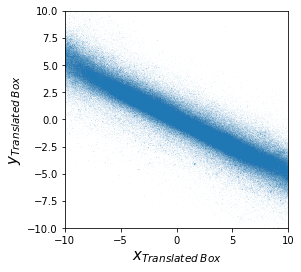

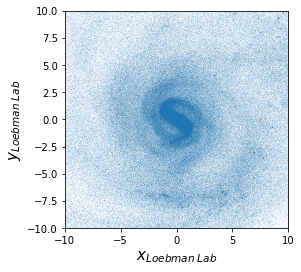

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 4))
plt.scatter(x_young, y_young, s=0.0001)
plt.xlabel('$x_{Translated\; Box}$', fontsize=15)
plt.ylabel('$y_{Translated\; Box}$', fontsize=15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

fig = plt.figure(figsize=(4, 4))
plt.scatter(x_young_ll, y_young_ll, s=0.0001)
plt.xlabel('$x_{Loebman\; Lab}$', fontsize=15)
plt.ylabel('$y_{Loebman\; Lab}$', fontsize=15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [9]:
print(x_young)

[16.3698015  17.14918403 17.19606665 ...  0.72947826  0.72776072
  0.73615188]


TypeError: 'numpy.dtype[float64]' object is not callable